# STUDENT DETAILS:

Student Name and ID: PRAJAKTA GANESH JALISATGI, 1001637722 
MyLastName: JALISATGI, 
MY_FirstName: PRAJAKTA GANESH, 
[My_StudentID]:[1001637722]

# Programming Assignment 2: KNN Classifier

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
df_census.head(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#return the last 5 rows of the dataset
df_census.tail(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
#print the class names
df_census['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
df_census.drop(columns=['Date','fnlwgt','education','relationship','capital-gain','capital-loss'],axis=1)

,Age,WorkClass,education-num,marital-status,occupation,race,gender,hours-per-week,native-country,class
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,>50K


In [6]:
df_census=df_census.replace(' ?',pd.np.nan)
df_census=df_census.dropna()
df_census

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,11/28/1994,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,3/2/1994,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,11/27/1994,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,12/25/1994,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10/10/1994,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
df_census_filtered = df_census.drop(columns=['Date','fnlwgt','education','relationship','capital-gain','capital-loss'],axis=1)
df_census_filtered

,Age,WorkClass,education-num,marital-status,occupation,race,gender,hours-per-week,native-country,class
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,>50K


In [8]:
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()

le.fit(df_census_filtered['WorkClass'])
arr_census_workclass = le.transform(df_census_filtered['WorkClass'])
arr_census_workclass = np.array(arr_census_workclass)


le.fit(np.array(df_census_filtered['marital-status']))
arr_census_marital_status = le.transform(df_census_filtered['marital-status'])
arr_census_marital_status = np.array(arr_census_marital_status)

le.fit(df_census_filtered['occupation'])
arr_census_occupation = le.transform(df_census_filtered['occupation'])
arr_census_occupation = np.array(arr_census_occupation)

le.fit(df_census_filtered['race'])
arr_census_race = le.transform(df_census_filtered['race'])
arr_census_race = np.array(arr_census_race)

le.fit(df_census_filtered['native-country'])
arr_census_native_country = le.transform(df_census_filtered['native-country'])
arr_census_native_country = np.array(arr_census_native_country)


In [9]:
le.fit(df_census_filtered['gender'])
arr_gender = le.transform(df_census_filtered['gender'])

le.fit(df_census_filtered['class'])
arr_class = le.transform(df_census_filtered['class'])
arr_class = list(arr_class)

In [10]:
X = np.array([list(arr_census_workclass),list(arr_census_occupation),list(arr_census_marital_status),list(arr_census_race),list(arr_census_native_country),list(arr_gender)])
X

array([[ 5,  4,  2, ...,  2,  2,  3],
       [ 0,  3,  5, ...,  0,  0,  3],
       [ 4,  2,  0, ...,  6,  4,  2],
       [ 4,  4,  4, ...,  4,  4,  4],
       [38, 38, 38, ..., 38, 38, 38],
       [ 1,  1,  1, ...,  0,  1,  0]])

In [11]:
X = X.T
X.shape

(30162, 6)

In [12]:
y = np.array(arr_class)
y

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=2).fit(X, np.array(arr_class))
X_new = SelectKBest(chi2, k=2).fit_transform(X, np.array(arr_class))
cols = selector.get_support(indices=True)
cols

array([2, 5], dtype=int64)

In [14]:
#marital status and gender since index 2 is martial_status and index 5 is gender

arr_census_marital_status = list(arr_census_marital_status)
arr_gender = list(arr_gender)
X_data = np.array([arr_census_marital_status,arr_gender]).T
#X_data.shape
y

array([0, 0, 0, ..., 0, 0, 1])

In [15]:
#Accuracy score for neighbor 1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.30, random_state=42)
n_neighbors=3
neigh = KNeighborsClassifier(n_neighbors=3,p=2)
neigh.fit(X_train,y_train) 
predict = neigh.predict(X_test)
acc_score = accuracy_score(y_test, predict)
acc_score

0.7449441927284783

In [16]:
#confusion matrix for neighbour 1
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[6729,   38],
       [2270,   12]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      6767
           1       0.24      0.01      0.01      2282

    accuracy                           0.74      9049
   macro avg       0.49      0.50      0.43      9049
weighted avg       0.62      0.74      0.64      9049



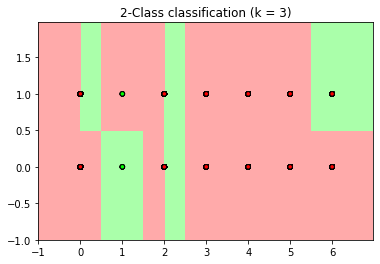

In [18]:
from matplotlib.colors import ListedColormap

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))

plt.show()

In [19]:
#Accuracy score for neighbor 2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.30, random_state=42)
n_neighbors=6
neigh = KNeighborsClassifier(n_neighbors=6,p=2)
neigh.fit(X_train,y_train) 
predict = neigh.predict(X_test)
acc_score = accuracy_score(y_test, predict)
acc_score

0.7475964194938667

In [20]:
#confusion matrix for neighbour 2
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[6763,    4],
       [2280,    2]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6767
           1       0.33      0.00      0.00      2282

    accuracy                           0.75      9049
   macro avg       0.54      0.50      0.43      9049
weighted avg       0.64      0.75      0.64      9049



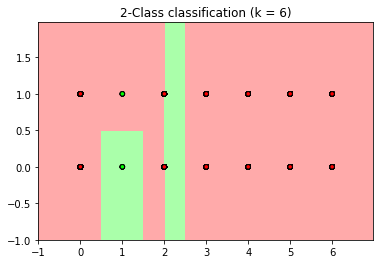

In [22]:
from matplotlib.colors import ListedColormap

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))

plt.show()

In [23]:
#Accuracy score for neighbor 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.30, random_state=42)
n_neighbors=10
neigh = KNeighborsClassifier(n_neighbors=10,p=2)
neigh.fit(X_train,y_train) 
predict = neigh.predict(X_test)
acc_score = accuracy_score(y_test, predict)
acc_score

0.745165211625594

In [24]:
#confusion matrix for neighbour 3
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[6731,   36],
       [2270,   12]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      6767
           1       0.25      0.01      0.01      2282

    accuracy                           0.75      9049
   macro avg       0.50      0.50      0.43      9049
weighted avg       0.62      0.75      0.64      9049



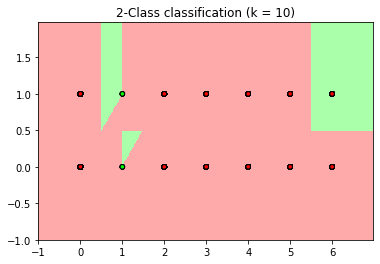

In [27]:
from matplotlib.colors import ListedColormap

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))

plt.show()